This notebook compares the performance among different types of heuristics called upon the computation of P2B. At present, 3 types of heuristics have been implemented:

- **Timeout**: the exploration terminates when it has exceeds a certain amount of time (parameter: the amount of time in ms)
- **Max edges**: the exploration terminates when it has discovered N percent of the edges in the virtual graph (parameter: the percent of edges to be discovered)
- **Exhaustive**: the exploration is exhaustive, it only stops once every node has been discovered (no parameter required)

## 1. Preparing the data

In [1]:
# some libraries for the processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the path of the result file
path_exhaustive = '../rdf/2018-0607-RDF-fixedindexing-exh.log' 
path_timeout = '../rdf/2018-0707-RDF-timeout.log'
path_maxedges = '../rdf/2018-0707-RDF-maxedges.log'

In [3]:
# extract the details of the system properties on which the experiment was conducted
def extract_header(filename):
    d = {}
    num_header = 0
    with open(filename, 'r') as f:
        props = {}
        name = ''
        for _l in f:
            line = _l.strip()
            if line.startswith('#'):
                num_header += 1
                if len(line)>1:
                    line = line.replace('#', '').strip().replace(': ', '=')
                    if len(line.split('=')) == 1: # another property
                        name = line
                        props = {}
                        d[name] = props
                    else:
                        r = line.split('=')
                        props[r[0].replace('--', '')] = r[1]

    # the dataframes that correspond to each type of properties
    result = {
        'compile': pd.DataFrame.from_dict(d['Compile-time properties'], orient='index'),
        'system': pd.DataFrame.from_dict(d['System'], orient='index'),
        'project': pd.DataFrame.from_dict(d['Config'], orient='index'),
        'params': pd.DataFrame.from_dict(d['Command line params'], orient='index'),
        'num_header': num_header
    }
    
    return result

In [4]:
input_exhaustive = extract_header(path_exhaustive)
input_timeout = extract_header(path_timeout)
input_maxedges = extract_header(path_maxedges)

### The command line parameters corresponding to each type of heuristics

In [5]:
input_exhaustive['params'].merge(input_timeout['params'], right_index=True, left_index=True, suffixes=("_Exhaustive", "_Timeout")).merge(input_maxedges['params'], right_index=True, left_index=True, suffixes=("_Timeout", "_MaxEdes"))

0_Exhaustive  \
help                                                                false   
extractor               fr.inria.cedar.kwdSearchHet.extraction.LazyOpe...   
p2b-param                                                              []   
databases                                                              []   
reset-between-datasets                                              false   
output                                       java.io.PrintStream@31b80ceb   
config                                                                      
verbose                                                             false   
p2b-method                                                            DFS   
p2b-heuristic                                                        NONE   
thread-for-p2b                                                      false   
scoring                                                                     
query                                                                       
reset-at-start                                                       true   
lang                                                                   fr   
interactive-mode                                                    false   
input                   [fr/RDF/model-03_17-disjoint/model-03_17-50.nt...   

                                                                0_Timeout  \
help                                                                false   
extractor               fr.inria.cedar.kwdSearchHet.extraction.LazyOpe...   
p2b-param                                                          [1000]   
databases                                                              []   
reset-between-datasets                                              false   
output                                       java.io.PrintStream@31b80ceb   
config                                                                      
verbose                                                             false   
p2b-method                                                            DFS   
p2b-heuristic                                                     TIMEOUT   
thread-for-p2b                                                      false   
scoring                                                                     
query                                                                       
reset-at-start                                                       true   
lang                                                                   fr   
interactive-mode                                                    false   
input                   [fr/RDF/model-03_17-disjoint/model-03_17-50.nt...   

                                                                        0  
help                                                                false  
extractor               fr.inria.cedar.kwdSearchHet.extraction.LazyOpe...  
p2b-param                                                           [0.7]  
databases                                                              []  
reset-between-datasets                                              false  
output                                       java.io.PrintStream@31b80ceb  
config                                                                     
verbose                                                             false  
p2b-method                                                            DFS  
p2b-heuristic                                                    MAXEDGES  
thread-for-p2b                                                      false  
scoring                                                                    
query                                                                      
reset-at-start                                                       true  
lang                                                                   fr  
interactive-mode                                                    fal

### The common compile-time properties

In [6]:
input_exhaustive['compile']

0
Module     kwd-search-het
Version    0.0.2-SNAPSHOT
Branch        experiments
ChangeSet         f02733d
Build       20180706-1714

### The common system configuration (on which version of which OS, the number of CPUs)

In [7]:
input_exhaustive['system']

0
StartTime                     2018-07-06
OS                                 Linux
OSArch                             amd64
OSVersion      3.10.0-693.2.2.el7.x86_64
StartUpMem                        1630MB
StartUpMaxMem                    28631MB
NumCPUs                               40

### The common configuration of the project (relational settings, treetagger)

In [8]:
input_exhaustive['project']

0
PYTHONPath                                                /python
RDBMSHost                                               localhost
RDBMSUser                                                kwsearch
RDBMSTableName                                                   
RDBMSPort                                                    5432
cache_location                                              cache
RDBMSDBName                                              kwsearch
RDBMSPassword                                                    
default_locale                                                 fr
RDFDBName                                              testkwdrdf
solrConfigSets  /path/to/SOFT/solr-6.6.1/solr/server/solr/conf...

## 2. Experiment results

### 2.1 - Exhaustive exploration of P2B

In [9]:
data_exhaustive = pd.read_csv(path_exhaustive, skiprows=input_exhaustive['num_header'], 
                              sep='\t', skipfooter=1, engine='python')
data_exhaustive['TotalTime (s)'] = data_exhaustive['TotalTime']/1000
data_exhaustive['TotalTime (min)'] = data_exhaustive['TotalTime']/(1000*60)
data_exhaustive['Time per same as (ms)'] = data_exhaustive['SAMEAS']/data_exhaustive['NUM_SAMEAS']
data_exhaustive.round(3)

INPUT  INIT  NUM_SAMEAS  \
0  /data/connectionlens/fr/RDF/model-03_17-disjoi...     1         156   
1  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        1073   
2  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        4476   
3  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       18453   
4  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       67989   
5  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      232051   
6  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      839029   
7  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0     3034747   

   SUMMARIZATION  TRIPLE_PARSING  INPUT_SIZE  INDEXING  EXTRACTION  SAMEAS  \
0            729               7          50       724           0      40   
1            602               6         100       709           0      82   
2            650               6         200      1509           0     188   
3            652               5         400      3110           0     627   
4            678               7         800      4915           0    1877   
5            730               7        1600      8922           0    5902   
6            784               9        3200     17297           0   22630   
7            986              20        6400     28877           0   83701   

   NODES  EDGES  BORDERS  BUILDMAP  PATH2BORDERS  NUM_P2B  TotalTime  \
0     50     50        0        75           112      667       1688   
1    131    150       20        89           423     3275       1911   
2    296    350       51       203          1402    12998       3958   
3    605    751       97       413          3798    38256       8605   
4   1185   1552      182       765         14541   126568      22783   
5   2262   3165      337      1560         57528   414394      74649   
6   4332   6397      678      3026        216068  1209034     259814   
7   8240  12964     1597      6235        843730  3199224     963549   

   TotalTime (s)  TotalTime (min)  Time per same as (ms)  
0          1.688            0.028                  0.256  
1          1.911            0.032                  0.076  
2          3.958            0.066                  0.042  
3          8.605            0.143                  0.034  
4         22.783            0.380                  0.028  
5         74.649            1.244                  0.025  
6        259.814            4.330                  0.027  
7        963.549           16.059                  0.028

### 2.2 - Exploration with timeout

In [10]:
data_timeout = pd.read_csv(path_timeout, skiprows=input_timeout['num_header'], 
                              sep='\t', skipfooter=1, engine='python')
data_timeout['TotalTime (s)'] = data_timeout['TotalTime']/1000
data_timeout['TotalTime (min)'] = data_timeout['TotalTime']/(1000*60)
data_timeout['Time per same as (ms)'] = data_timeout['SAMEAS']/data_timeout['NUM_SAMEAS']
data_timeout.round(3)

INPUT  INIT  NUM_SAMEAS  \
0  /data/connectionlens/fr/RDF/model-03_17-disjoi...     1         156   
1  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        1073   
2  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        4476   
3  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       18453   
4  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       67989   
5  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      232051   
6  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      839029   
7  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0     3034747   

   SUMMARIZATION  TRIPLE_PARSING  INPUT_SIZE  INDEXING  EXTRACTION  SAMEAS  \
0            702               5          50       682           0      47   
1            603               4         100       743           0      84   
2            591               6         200      1249           0     185   
3            621               5         400      2339           0     612   
4            645               8         800      4290           0    1847   
5            733               8        1600      7249           0    5950   
6            766               9        3200     13682           0   23190   
7            968              14        6400     21321           0   83334   

   NODES  EDGES  BORDERS  BUILDMAP  PATH2BORDERS  NUM_P2B  TotalTime  \
0     50     50        0        72           109      667       1618   
1    131    150       20        89           408     3275       1931   
2    296    350       51       187          1367    12998       3585   
3    605    751       97       371          3760    38256       7708   
4   1185   1552      182       724         14732   126568      22246   
5   2262   3165      337      1472         57532   414394      72944   
6   4332   6397      678      3023        218979  1209034     259649   
7   8240  12964     1597      6464        897910  3199224    1010011   

   TotalTime (s)  TotalTime (min)  Time per same as (ms)  
0          1.618            0.027                  0.301  
1          1.931            0.032                  0.078  
2          3.585            0.060                  0.041  
3          7.708            0.128                  0.033  
4         22.246            0.371                  0.027  
5         72.944            1.216                  0.026  
6        259.649            4.327                  0.028  
7       1010.011           16.834                  0.027

### 2.3 - Exploration with constraint on the maximum number of edges

In [12]:
data_maxedges = pd.read_csv(path_maxedges, skiprows=input_maxedges['num_header'], 
                              sep='\t', skipfooter=1, engine='python')
data_maxedges['TotalTime (s)'] = data_maxedges['TotalTime']/1000
data_maxedges['TotalTime (min)'] = data_maxedges['TotalTime']/(1000*60)
data_maxedges['Time per same as (ms)'] = data_maxedges['SAMEAS']/data_maxedges['NUM_SAMEAS']
data_maxedges.round(3)

INPUT  INIT  NUM_SAMEAS  \
0  /data/connectionlens/fr/RDF/model-03_17-disjoi...     1         156   
1  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        1073   
2  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0        4476   
3  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       18453   
4  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0       67989   
5  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      232051   
6  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0      839029   
7  /data/connectionlens/fr/RDF/model-03_17-disjoi...     0     3034747   

   SUMMARIZATION  TRIPLE_PARSING  INPUT_SIZE  INDEXING  EXTRACTION  SAMEAS  \
0            931               6          50       685           0      46   
1            639               5         100       671           0      77   
2            648               5         200      1383           0     175   
3            653               5         400      1755           0     614   
4            666               6         800      5170           0    1860   
5            753               8        1600      7316           0    5916   
6            771               9        3200     12988           0   22325   
7            983              16        6400     22645           0   82819   

   NODES  EDGES  BORDERS  BUILDMAP  PATH2BORDERS  NUM_P2B  TotalTime  \
0     50     50        0        71            70      379       1810   
1    131    150       20        93           162     1337       1647   
2    296    350       51       194           550     4880       2955   
3    605    751       97       358          1255    13820       4640   
4   1185   1552      182       731          4699    44828      13132   
5   2262   3165      337      1618         16750   145754      32361   
6   4332   6397      678      3135         53307   425264      92535   
7   8240  12964     1597      6143        175451  1122085     288057   

   TotalTime (s)  TotalTime (min)  Time per same as (ms)  
0          1.810            0.030                  0.295  
1          1.647            0.027                  0.072  
2          2.955            0.049                  0.039  
3          4.640            0.077                  0.033  
4         13.132            0.219                  0.027  
5         32.361            0.539                  0.025  
6         92.535            1.542                  0.027  
7        288.057            4.801                  0.027

## 3. Visualization

In [13]:
time_measures = ['SUMMARIZATION', 'TRIPLE_PARSING', 'INDEXING', 'SAMEAS', 
                 'EXTRACTION', 'BUILDMAP', 'PATH2BORDERS', 
                 'TotalTime']
item_measures = ['NODES', 'EDGES', 'BORDERS', 'NUM_P2B']
size = ['INPUT_SIZE']

In [14]:
X = data_exhaustive[size].values # get the number of triple

### (A) Line plot: execution time of each phase

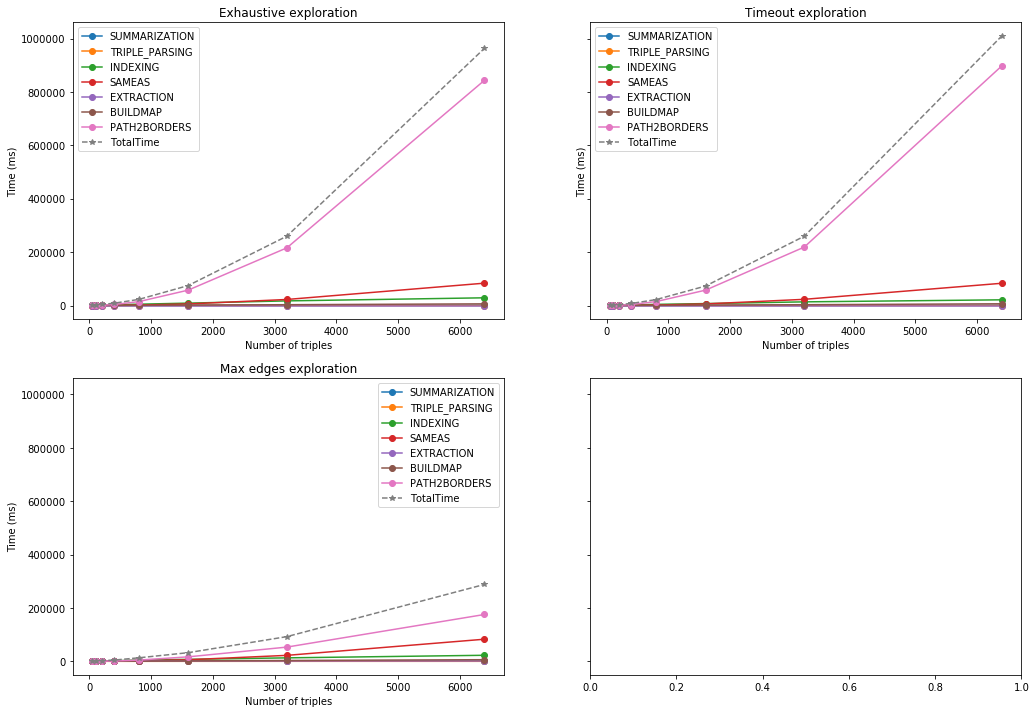

In [15]:
def plot_line_time(X, data, title, ax):
    ax.plot(X, data[time_measures[0:7]], marker='o')
    ax.plot(X, data[time_measures[-1]], marker='*', linestyle='--')
    ax.set_title(title)
    ax.legend(time_measures)
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Number of triples')

fig, axes = plt.subplots(2, 2, figsize=(17,12), sharey=True)
plot_line_time(X, data_exhaustive, 'Exhaustive exploration', axes[0,0])
plot_line_time(X, data_timeout, 'Timeout exploration', axes[0,1])
plot_line_time(X, data_maxedges, 'Max edges exploration', axes[1,0])
plt.show()

### (B) Pie chart: the portion of execution time occupied by each phase (sorted in descending order)

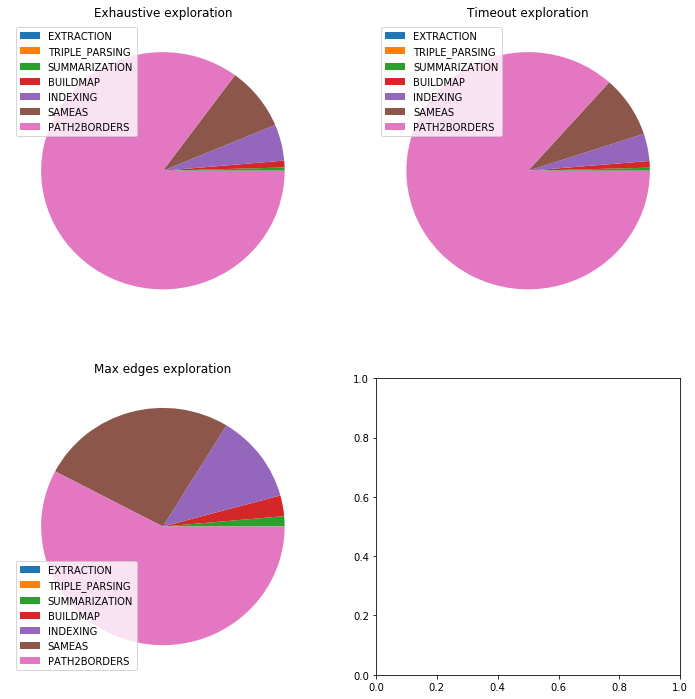

In [16]:
def plot_pie(data, title, ax):
    means = np.mean(data[time_measures[0:7]].values, axis=0)
    order = np.argsort(means)
    ax.pie(means[order])
    ax.legend(labels[order])
    ax.set_title(title)
    
labels = np.array(time_measures[0:7])
fig, axes = plt.subplots(2, 2, figsize = (12,12))
plot_pie(data_exhaustive, 'Exhaustive exploration', axes[0,0])
plot_pie(data_timeout, 'Timeout exploration', axes[0,1])
plot_pie(data_maxedges, 'Max edges exploration', axes[1,0])
plt.show()

### (C) Line chart: number of items created after the registration of each source (nodes, edges, borders)

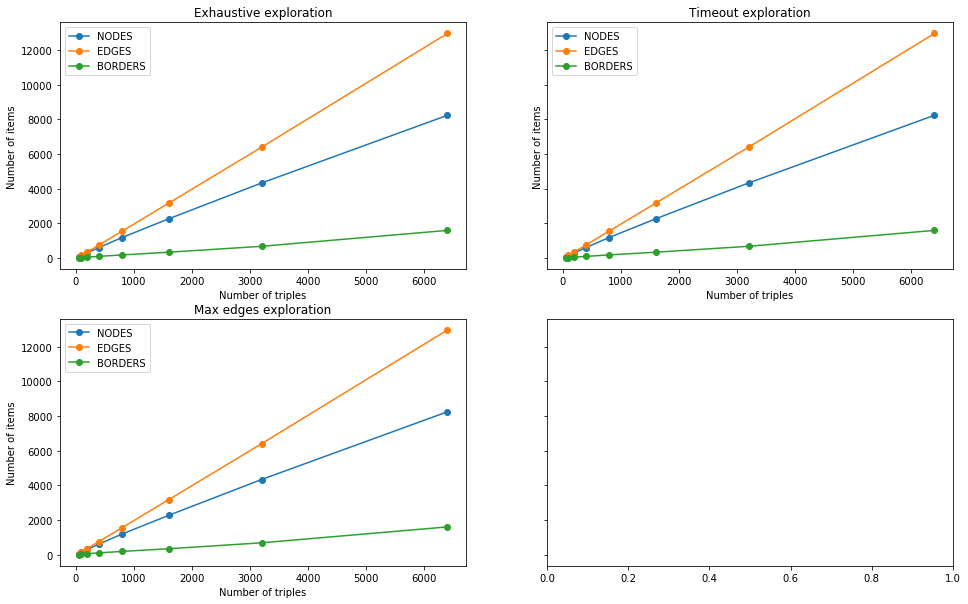

In [17]:
def plot_items_nop2b(X, data, title, ax):
    ax.plot(X, data[item_measures[:-1]], marker='o')
    ax.legend(item_measures[:-1])
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Number of items')
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True)
plot_items_nop2b(X, data_exhaustive, 'Exhaustive exploration', axes[0,0])
plot_items_nop2b(X, data_timeout, 'Timeout exploration', axes[0,1])
plot_items_nop2b(X, data_maxedges, 'Max edges exploration', axes[1,0])
plt.show()

### (D) Line chart: number of items created after the publication of each source, including the number of P2B's

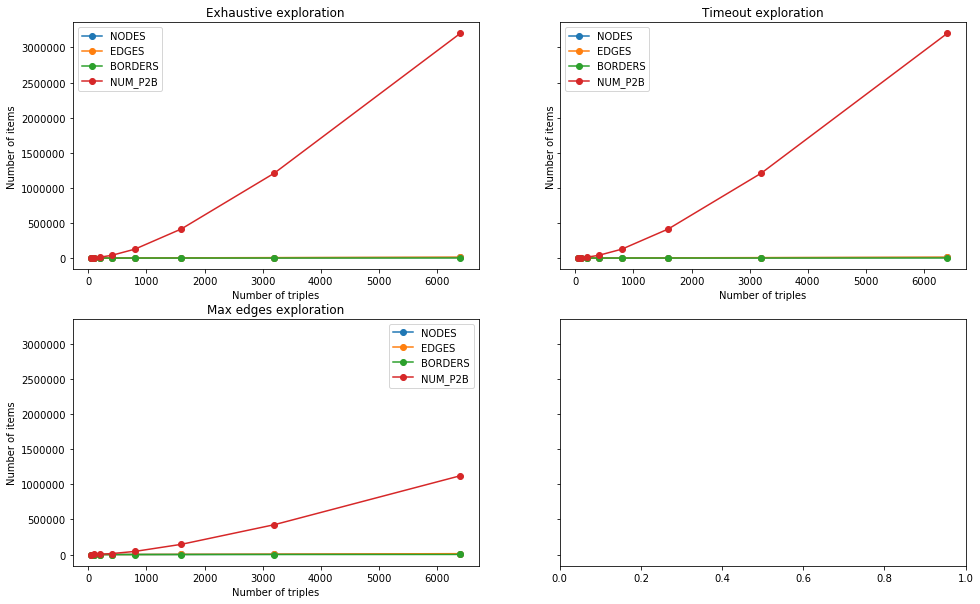

In [18]:
def plot_items(X, data, title, ax):
    ax.plot(X, data[item_measures], marker='o')
    ax.legend(item_measures)
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Number of items')
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True)
plot_items(X, data_exhaustive, 'Exhaustive exploration', axes[0,0])
plot_items(X, data_timeout, 'Timeout exploration', axes[0,1])
plot_items(X, data_maxedges, 'Max edges exploration', axes[1,0])

plt.show()

This plot also shows the growth rate of the number of nodes, edges, borders, and P2B's as we double the input size (in (C) the line of P2B's is not included). The number of P2B's rises exponentially, with 6000 triples we create more than 3,000,000 P2B's (`select count(*) from p2b`).

### (E) Line chart: Number of P2B's v.s. The execution time of P2B computation

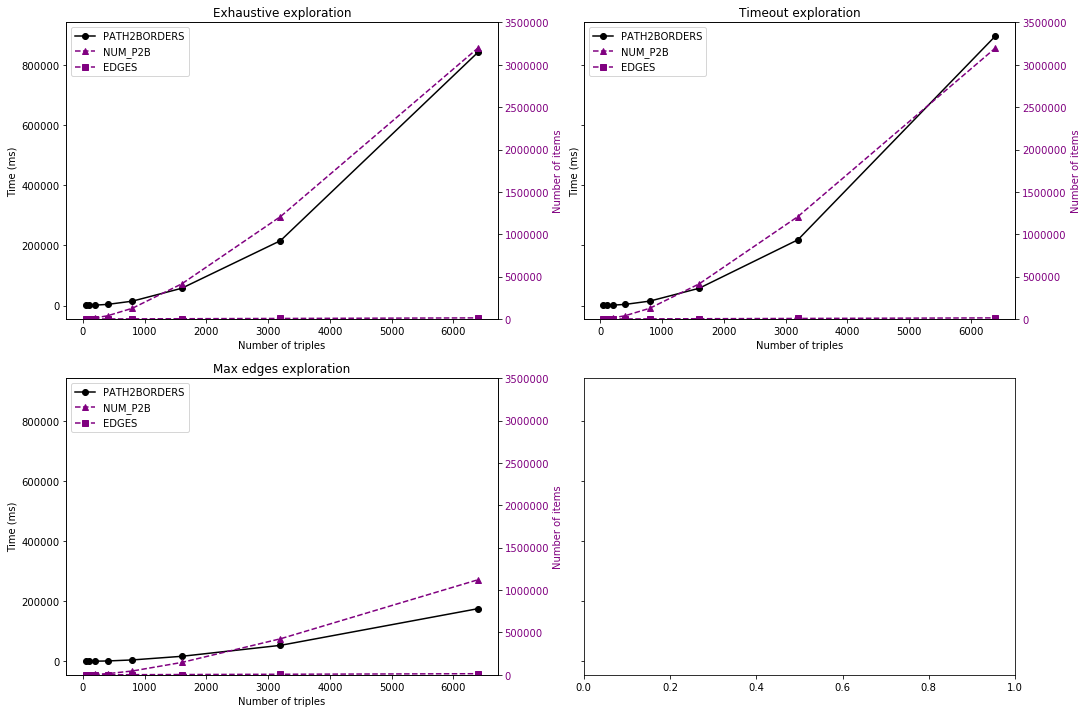

In [19]:
def p2b_time_amount(X, data, title, ax):
    color1 = 'black'
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Time (ms)', color=color1)
    f1 = ax.plot(X, data['PATH2BORDERS'].values, marker='o', color=color1)
    ax.tick_params(axis='y', labelcolor=color1)
    
    ax2 = ax.twinx()
    color2 = 'purple'
    ax2.set_ylabel('Number of items', color=color2)
    f2 = ax2.plot(X, data['NUM_P2B'].values, marker='^', color=color2, linestyle='--')
    f3 = ax2.plot(X, data['EDGES'].values, marker='s', color=color2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(0, 3500000)
    
    figs = f1+f2+f3
    ax.legend(figs, ['PATH2BORDERS', 'NUM_P2B', 'EDGES'], loc=2)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(17,12), sharey=True)
p2b_time_amount(X, data_exhaustive, 'Exhaustive exploration', axes[0,0])
p2b_time_amount(X, data_timeout, 'Timeout exploration', axes[0,1])
p2b_time_amount(X, data_maxedges, 'Max edges exploration', axes[1,0])

plt.show()